In [1]:
# 1. Importing all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 2. Loading dataset
data = pd.read_csv('/Users/verpuchinskiy/Downloads/world_happiness_2024.csv', sep=';', encoding_errors='ignore')

In [7]:
# 3. Initial Exploration
data.head()

,Ranking,Country,Regional indicator,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,140,Afghanistan,South Asia,"1,721","2,93451",0,62,0,"0,22638","0,15383"
1,86,Albania,Central and Eastern Europe,"5,3042","6,71748","0,57133",74,"0,79892","0,34403","0,08517"
2,84,Argelia,Sub-Saharan Africa,"5,3635","6,18327","0,73652",72,"0,28611","0,22771","0,34775"
3,48,Argentina,Latin America and Caribbean,"6,1881","7,29612","0,85449",73,"0,78851","0,21822","0,1399"
4,81,Armenia,Commonwealth of Independent States,"5,4549","6,7441","0,71415",73,"0,75317","0,12831","0,3009"


In [8]:
data.shape

(140, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       140 non-null    int64 
 1   Country                       140 non-null    object
 2   Regional indicator            140 non-null    object
 3   Ladder score                  140 non-null    object
 4   GDP per capita                140 non-null    object
 5   Social support                140 non-null    object
 6   Healthy life expectancy       140 non-null    int64 
 7   Freedom to make life choices  140 non-null    object
 8   Generosity                    140 non-null    object
 9   Perceptions of corruption     140 non-null    object
dtypes: int64(2), object(8)
memory usage: 11.1+ KB


In [10]:
data.describe()

,Ranking,Healthy life expectancy
count,140.0000,140.000000
mean,70.5000,70.828571
std,40.5586,4.991998
min,1.0000,55.000000
25%,35.7500,67.000000
50%,70.5000,72.000000
75%,105.2500,75.000000
max,140.0000,81.000000


In [12]:
# 4. Data Cleaning
data.isnull().sum()

Ranking                         0
Country                         0
Regional indicator              0
Ladder score                    0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.dtypes

Ranking                          int64
Country                         object
Regional indicator              object
Ladder score                    object
GDP per capita                  object
Social support                  object
Healthy life expectancy          int64
Freedom to make life choices    object
Generosity                      object
Perceptions of corruption       object
dtype: object

In [18]:
columns_to_change = ['Ladder score', 'GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

for col in columns_to_change:
    data[col] = data[col].str.replace(',', '.').astype('float')

In [19]:
data.dtypes

Ranking                           int64
Country                          object
Regional indicator               object
Ladder score                    float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy           int64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [23]:
data = data [['Ranking', 'Country', 'Regional indicator', 'Ladder score', 'GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [31]:
columns_to_change = ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
data[columns_to_change] = data[columns_to_change] * 10

In [32]:
data.describe()

,Ranking,Ladder score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,5.530882,6.441332,70.828571,7.017045,7.188301,3.650760,2.679898
std,40.5586,1.181221,1.985895,4.991998,2.061883,1.882227,1.832604,2.195626
min,1.0000,1.721000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000
25%,35.7500,4.631600,5.033228,67.000000,5.699925,6.108775,2.273775,1.189475
50%,70.5000,5.800600,6.686325,72.000000,7.653500,7.426250,3.401000,2.089000
75%,105.2500,6.426050,8.134660,75.000000,8.557850,8.528775,4.806350,3.364725
max,140.0000,7.740700,10.000000,81.000000,10.000000,10.000000,10.000000,10.000000


In [21]:
# 5. Data Analysis

In [42]:
# Univariate analysis

Text(0.5, 1.0, 'Ladder Score Distribution')

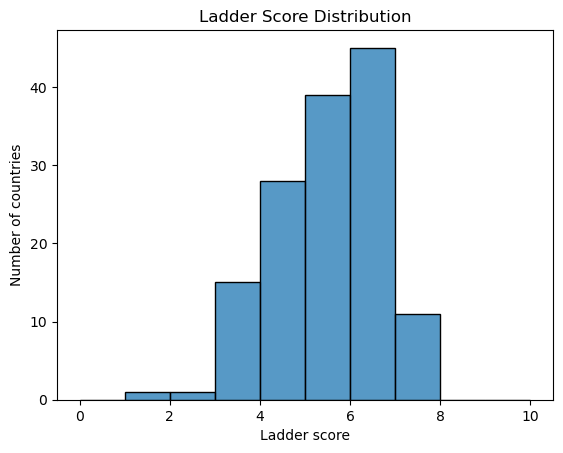

In [33]:
# Ladder score distribution
bins = np.arange(0, 11, 1)
sns.histplot(data=data, x='Ladder score', bins=bins)
plt.ylabel('Number of countries')
plt.title('Ladder Score Distribution')

Text(0.5, 1.0, 'GDP Per Capita Distribution')

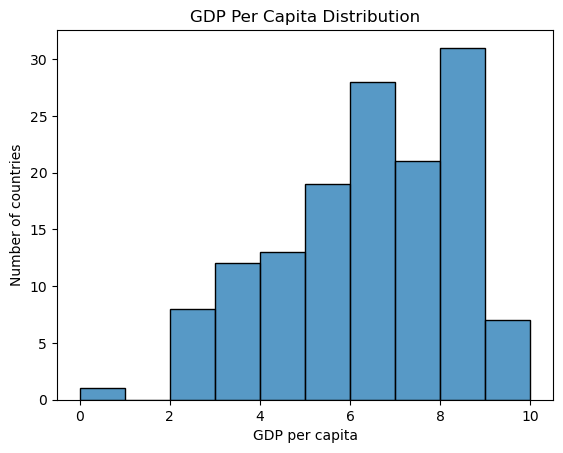

In [34]:
# GDP Per Capita Distribution
bins = np.arange(0, 11, 1)
sns.histplot(data=data, x='GDP per capita', bins=bins)
plt.ylabel('Number of countries')
plt.title('GDP Per Capita Distribution')

Text(0.5, 1.0, 'Healthy life expectancy Distribution')

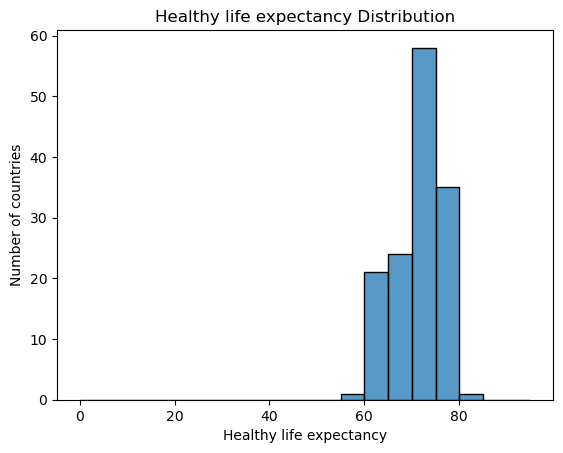

In [38]:
# Healthy Life Expectancy
bins = np.arange(0, 100, 5)
sns.histplot(data=data, x='Healthy life expectancy', bins=bins)
plt.ylabel('Number of countries')
plt.title('Healthy life expectancy Distribution')

In [41]:
# Happiness Score based on region
data.groupby(by='Regional indicator')['Ladder score'].mean().sort_values(ascending=False)

Regional indicator
North America and ANZ                 6.927625
Western Europe                        6.835591
Latin America and Caribbean           6.143368
Central and Eastern Europe            6.028571
East Asia                             5.820771
Southeast Asia                        5.603525
Commonwealth of Independent States    5.535913
Middle East and North Africa          5.164663
Sub-Saharan Africa                    4.354306
South Asia                            3.895700
Name: Ladder score, dtype: float64

In [43]:
# Bivariate analysis

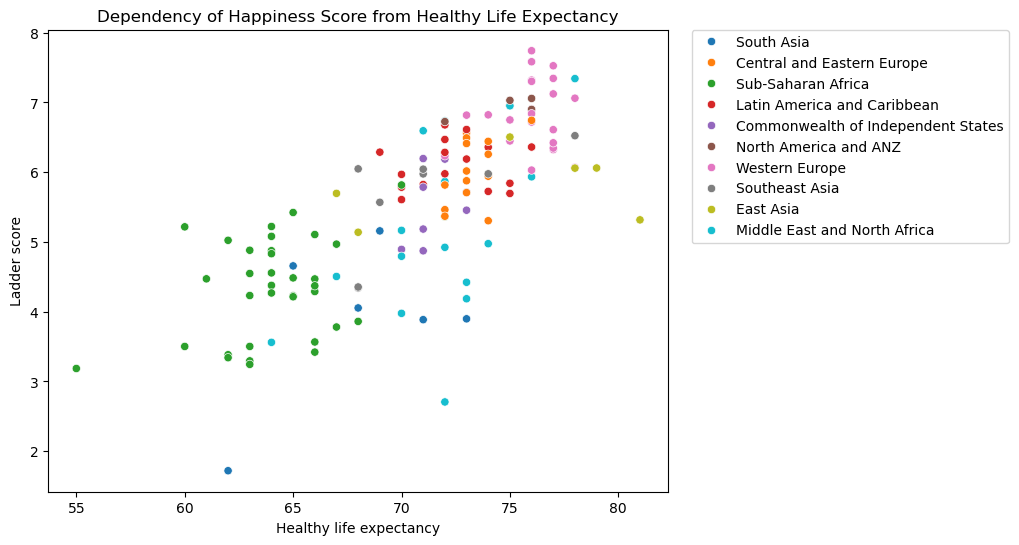

In [68]:
# Happiness Score and Healthy Life Expectancy relationship
plt.figure(figsize=(8, 6))
plt.title('Dependency of Happiness Score from Healthy Life Expectancy')
sns.scatterplot(data=data, x='Healthy life expectancy', y='Ladder score', hue='Regional indicator')
plt.legend(bbox_to_anchor=(1.55, 1), loc='upper right', borderaxespad=0)

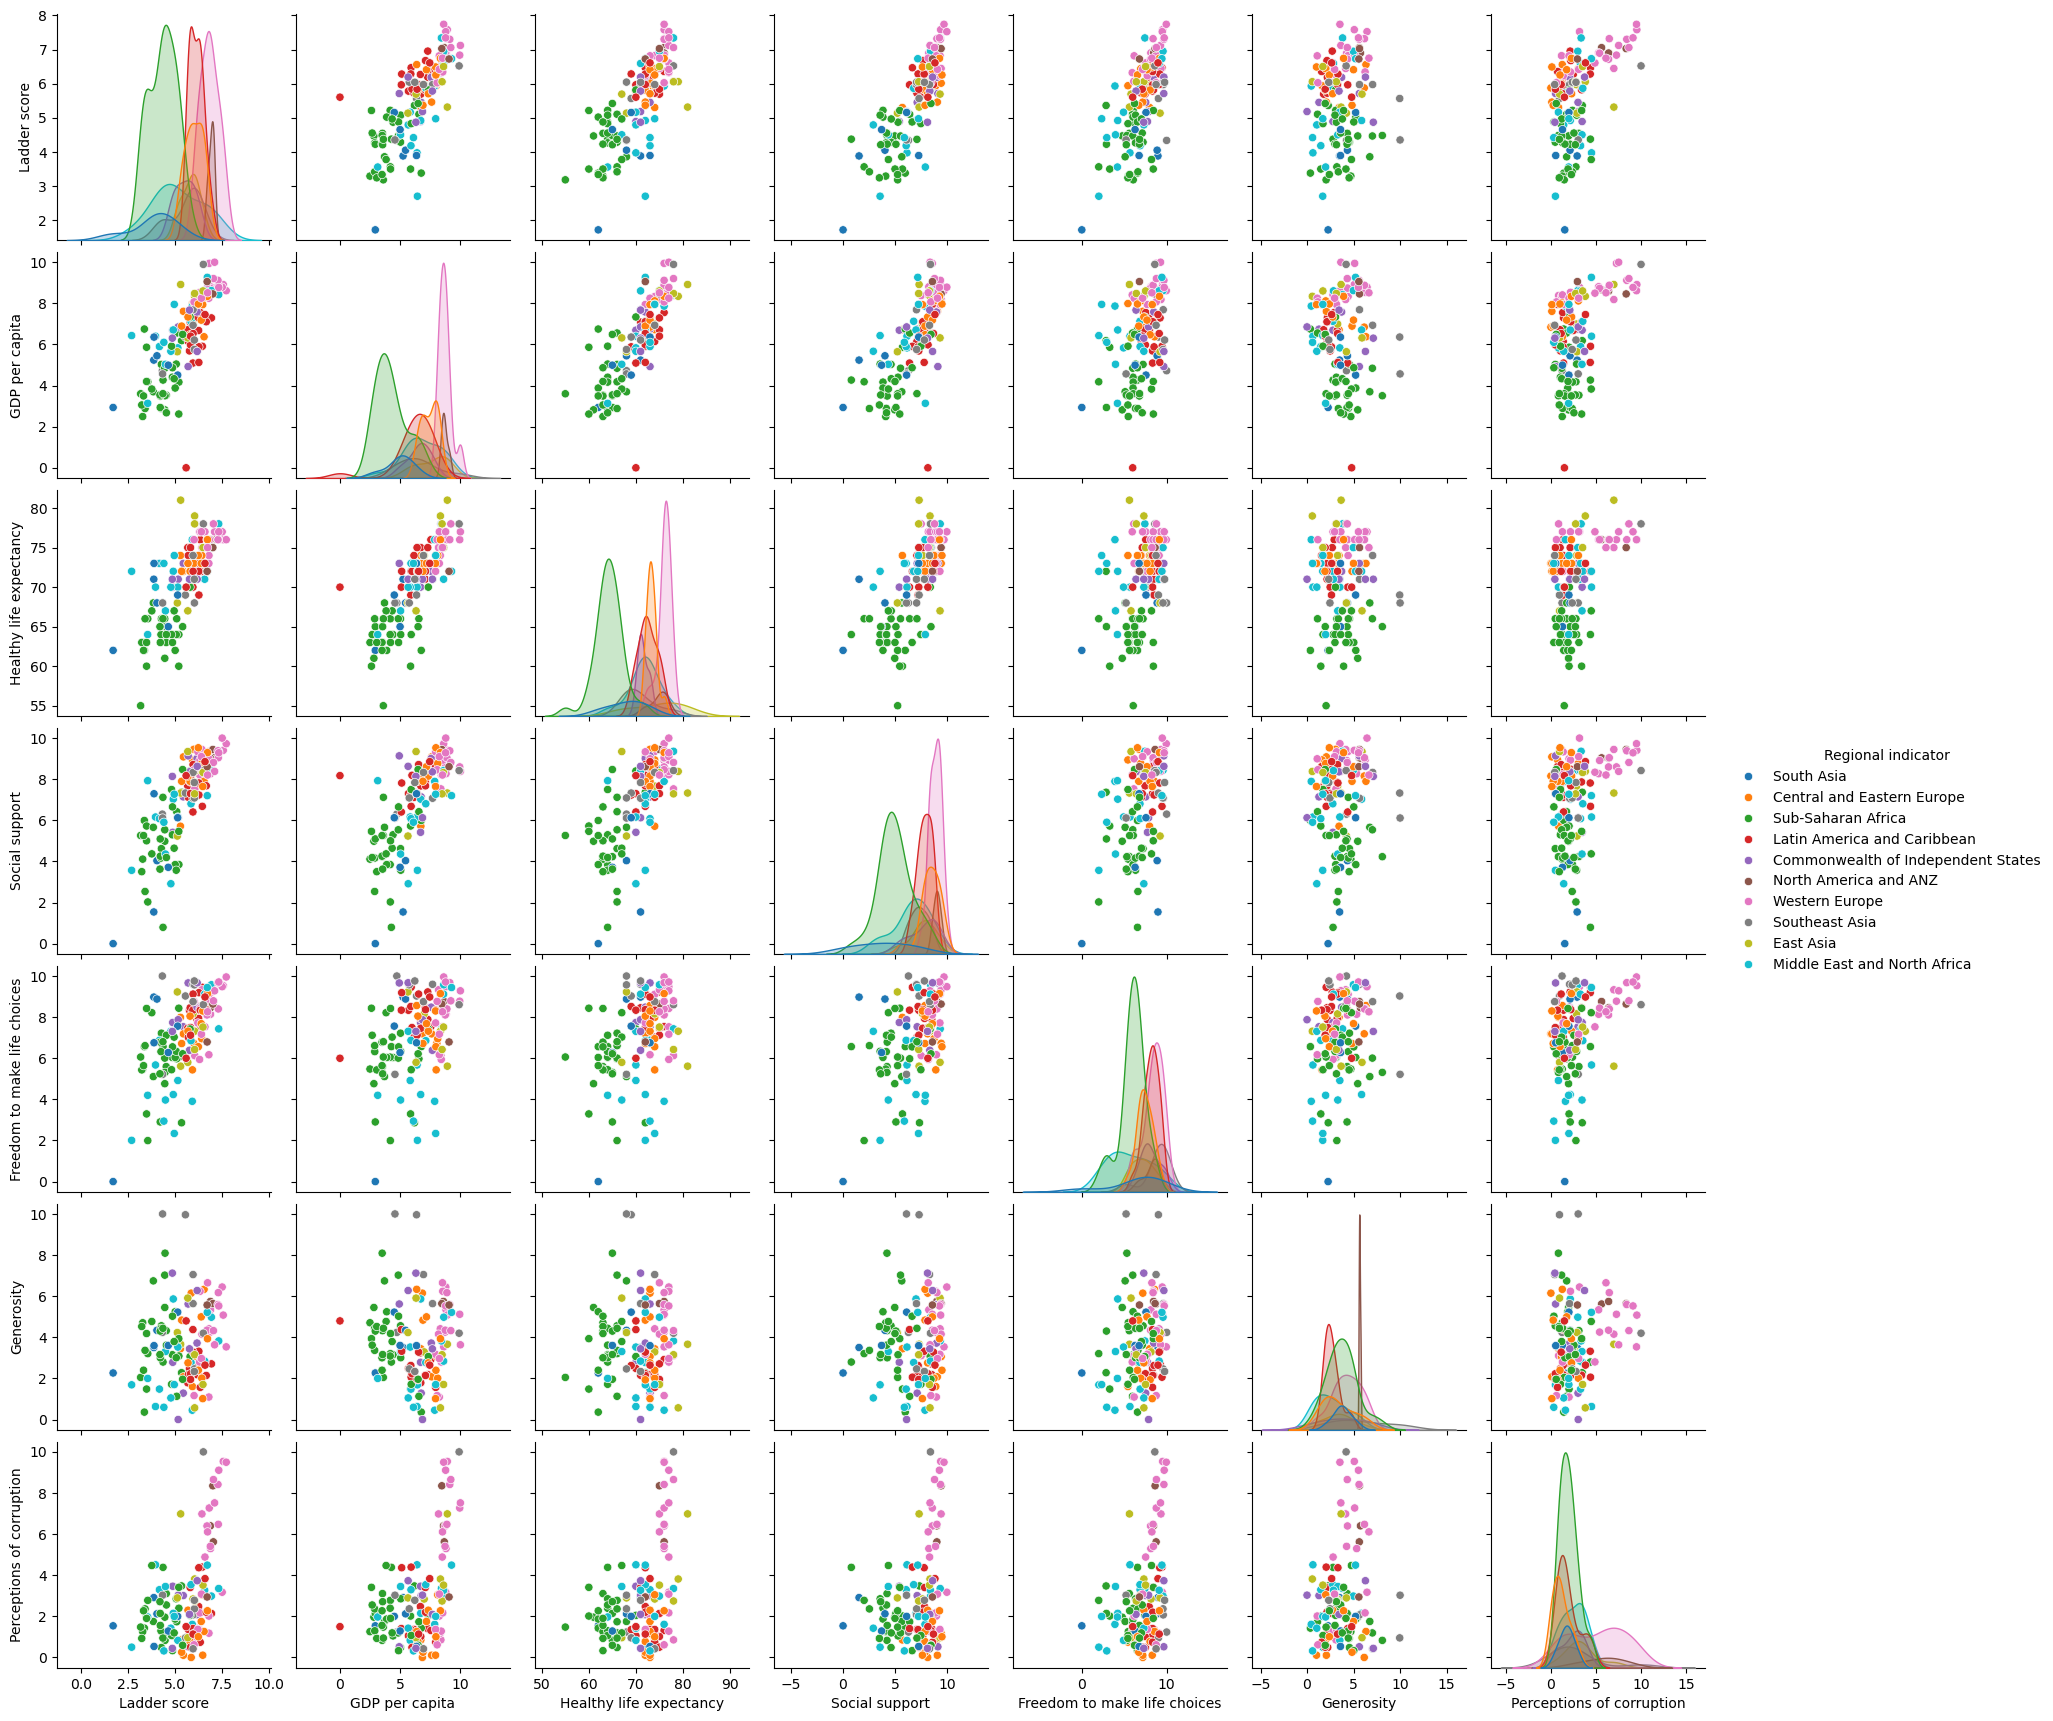

In [75]:
sns.pairplot(data=data, vars=['Ladder score', 'GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], hue='Regional indicator')

In [86]:
# Heatmap. Correlation between Happiness Score elements

In [88]:
corr = data[['Ladder score', 'GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()
corr

,Ladder score,GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.768501,0.758750,0.813538,0.644452,0.129989,0.451722
GDP per capita,0.768501,1.000000,0.827296,0.726783,0.414838,-0.059443,0.444252
Healthy life expectancy,0.758750,0.827296,1.000000,0.702832,0.406113,0.002522,0.393779
Social support,0.813538,0.726783,0.702832,1.000000,0.484731,0.079675,0.251008
Freedom to make life choices,0.644452,0.414838,0.406113,0.484731,1.000000,0.223951,0.344314
Generosity,0.129989,-0.059443,0.002522,0.079675,0.223951,1.000000,0.172513
Perceptions of corruption,0.451722,0.444252,0.393779,0.251008,0.344314,0.172513,1.000000


Text(0.5, 1.0, 'Happiness Score Correlation Heatmap')

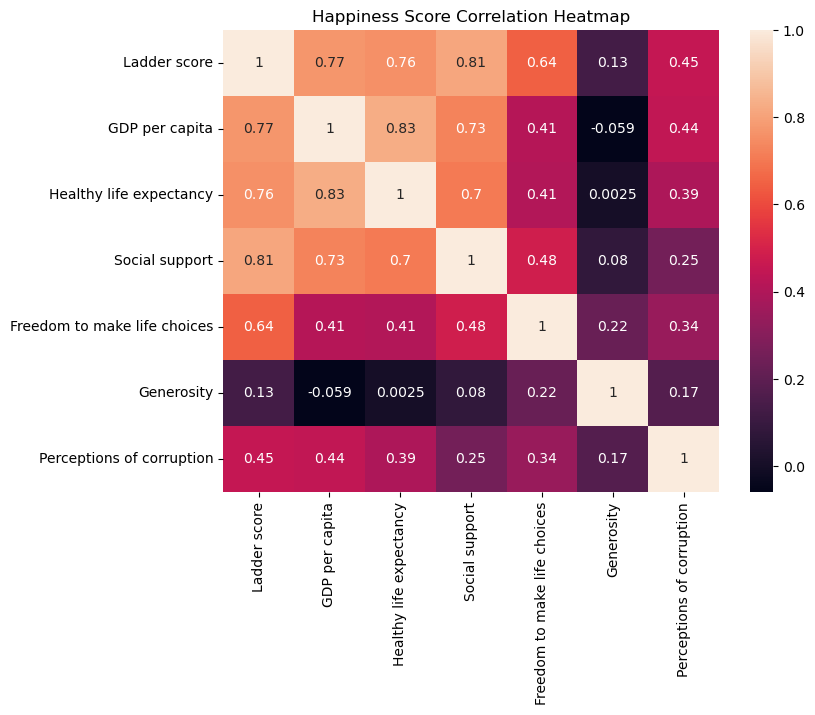

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True)
plt.title('Happiness Score Correlation Heatmap')